# Exploring Data Graphically

Let's take a look at the data graphically and make some comments based on manually looking up weather data.

In [1]:
# import required modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read our data to dataframe
data = pd.read_csv('./data/BlueSolarHistory.csv', parse_dates=['Date'])

In [3]:
# sanity check our data is reading correctly
data.head()

,Days ago,Date,Yield(Wh),Max. PV power(W),Max. PV voltage(V),Min. battery voltage(V),Max. battery voltage(V),Time in bulk(m),Time in absorption(m),Time in float(m),Last error,2nd last error,3rd last error,4th last error
0,0,2020-09-02,200,61.0,32.29,13.24,13.46,743,0,0,0,0,0,0
1,1,2020-09-01,340,252.0,37.09,13.25,14.21,583,124,60,0,0,0,0
2,2,2020-08-31,320,278.0,37.47,13.25,14.21,574,120,78,0,0,0,0
3,3,2020-08-30,600,321.0,37.68,13.22,14.28,653,124,0,0,0,0,0
4,4,2020-08-29,200,185.0,32.66,13.24,13.57,739,0,0,0,0,0,0


## Column Definitions

- Max. PV power(W): maximum output that occurred during the day; the absolute maximum is 2 * 175W = 350W
- Time in bulk(m): time spent delivering as much charge current as possible to rapidly charge batteries
- Time in absorption(m): time spent delivering constant voltage to batteries
- Time in float(m): time spent delivering float voltage to maintain fully charged state 

For furthre details, see [documentation](https://www.victronenergy.com/live/victronconnect:mppt-solarchargers) regarding Victron's MPPT solar chargers

In [4]:
# sort this data by date before plotting
data = data.sort_values(by='Date')

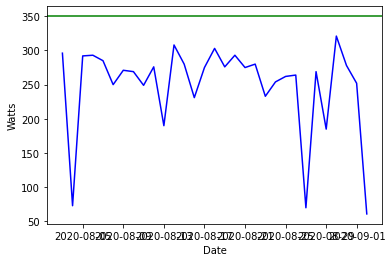

In [5]:
# plot date as X axis, max power PV along Y axis,
# constant absolute maximum as 350W
plt.plot(data['Date'], data['Max. PV power(W)'], color='b')
plt.axhline(y = 350, color='g')

# add labels for clarity
plt.xlabel('Date')
plt.ylabel('Watts')
plt.show()

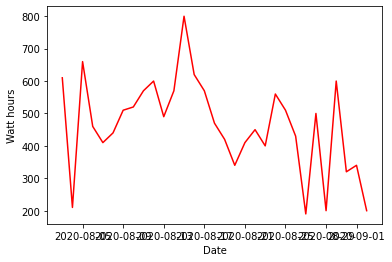

In [6]:
# plot date as X axis, max power PV along Y axis,
# constant absolute maximum as 350W
plt.plot(data['Date'], data['Yield(Wh)'], color='r')

# add labels for clarity
plt.xlabel('Date')
plt.ylabel('Watt hours')
plt.show()

## Maximum Power vs Output

Is there any correlation between the maximum power overall output for the day?

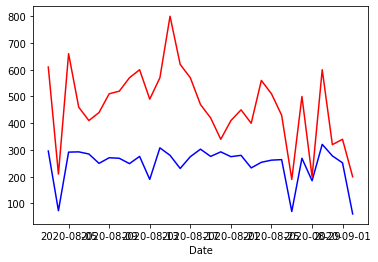

In [7]:
plt.plot(data['Date'], data['Max. PV power(W)'], color='b')
plt.plot(data['Date'], data['Yield(Wh)'], color='r')

# add labels for clarity
plt.xlabel('Date')
plt.show()

## Observations

Plots are nice to identify some of the trends, but the actual data is likely more useful to look at top 5 high/low output days and make remarks about each day's weather with manual reference.

In [8]:
# top 5 yields
data.sort_values(by='Yield(Wh)', ascending=False).head(5)

,Days ago,Date,Yield(Wh),Max. PV power(W),Max. PV voltage(V),Min. battery voltage(V),Max. battery voltage(V),Time in bulk(m),Time in absorption(m),Time in float(m),Last error,2nd last error,3rd last error,4th last error
18,18,2020-08-15,800,280.0,37.45,13.22,14.22,776,60,0,0,0,0,0
28,28,2020-08-05,660,292.0,35.12,13.23,13.67,841,0,0,0,0,0,0
17,17,2020-08-16,620,231.0,36.36,13.22,13.62,841,0,0,0,0,0,0
30,30,2020-08-03,610,296.0,35.85,13.25,14.21,682,159,0,0,0,0,0
3,3,2020-08-30,600,321.0,37.68,13.22,14.28,653,124,0,0,0,0,0


In [9]:
# bottom 5 yields
data.sort_values(by='Yield(Wh)', ascending=True).head(5)

,Days ago,Date,Yield(Wh),Max. PV power(W),Max. PV voltage(V),Min. battery voltage(V),Max. battery voltage(V),Time in bulk(m),Time in absorption(m),Time in float(m),Last error,2nd last error,3rd last error,4th last error
6,6,2020-08-27,190,70.0,33.03,13.24,13.46,782,0,0,0,0,0,0
0,0,2020-09-02,200,61.0,32.29,13.24,13.46,743,0,0,0,0,0,0
4,4,2020-08-29,200,185.0,32.66,13.24,13.57,739,0,0,0,0,0,0
29,29,2020-08-04,210,73.0,34.64,13.24,13.45,785,0,0,0,0,0,0
2,2,2020-08-31,320,278.0,37.47,13.25,14.21,574,120,78,0,0,0,0


## Weather Data

Using data available from [Wunderground](https://www.wunderground.com/history/daily/us/nh/jaffrey/KAFN), let's see what each day above produces in terms of overall weather descriptors.

In [10]:
# read in weather data
weather = pd.read_csv('./data/weather-data.csv')

# manually handle Datetime and Date to allow for a little more flexibility with the data
weather['Datetime'] = pd.to_datetime(weather['Date'] + ' ' + weather['Time'])
weather['Date'] = pd.to_datetime(weather['Date'])

In [11]:
# sanity check that we have data
weather.head()

,Location Name,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition,Datetime
0,"Jaffrey, NH (KAFN)",2020-08-03,12:13 AM,76 F,72 F,87 %,SSW,12 mph,0 mph,28.79 in,0.0 in,Thunder,2020-08-03 00:13:00
1,"Jaffrey, NH (KAFN)",2020-08-03,12:28 AM,76 F,73 F,91 %,SSW,10 mph,0 mph,28.79 in,0.1 in,Light Rain,2020-08-03 00:28:00
2,"Jaffrey, NH (KAFN)",2020-08-03,12:41 AM,76 F,72 F,87 %,SSW,8 mph,0 mph,28.79 in,0.1 in,Mostly Cloudy,2020-08-03 00:41:00
3,"Jaffrey, NH (KAFN)",2020-08-03,12:46 AM,75 F,73 F,94 %,S,6 mph,0 mph,28.79 in,0.1 in,Mostly Cloudy,2020-08-03 00:46:00
4,"Jaffrey, NH (KAFN)",2020-08-03,12:52 AM,76 F,73 F,91 %,SSW,8 mph,0 mph,28.79 in,0.1 in,Partly Cloudy,2020-08-03 00:52:00


In [12]:
# what are the valid types of weather present?
weather_types = weather.drop_duplicates('Condition').sort_values('Condition')['Condition'].to_list()
print(weather_types)

['Cloudy', 'Cloudy / Windy', 'Fair', 'Fog', 'Heavy Rain', 'Light Rain', 'Light Rain / Windy', 'Light Rain with Thunder', 'Mostly Cloudy', 'Partly Cloudy', 'Rain', 'T-Storm', 'Thunder', 'Thunder in the Vicinity']


In [13]:
# group by each date to find relevant conditions
weather.groupby(['Date', 'Condition']).size()

Date        Condition    
2020-08-03  Cloudy            2
            Fair             13
            Light Rain        1
            Mostly Cloudy    13
            Partly Cloudy     9
                             ..
2020-09-03  Fair              9
            Light Rain        3
            Mostly Cloudy     5
            Partly Cloudy     4
            Rain              1
Length: 136, dtype: int64

In [14]:
# what about the highest and lowest output days?
weather[(weather['Date'] == '2020-08-15') | (weather['Date'] == '2020-08-27')].groupby(['Date', 'Condition']).size()

Date        Condition    
2020-08-15  Cloudy            8
            Fair             16
            Mostly Cloudy     5
            Partly Cloudy     1
2020-08-27  Cloudy           21
            Fair              4
            Heavy Rain        1
            Light Rain        4
            Mostly Cloudy     2
            Rain              4
dtype: int64

## Interpreting Weather Data

There are some issues with the weather data supplied by automated weather reporting stations at airports. Each day may have a different number of reports based on when the weather changes, such as a thunderstorm appearing in the middle of an hour.

Also, we need to filter any rows that are reported before sunrise or after sunset, as the likelihood of the solar panels generating any power during these times is near zero. We could use civil twilight as the basis for determining nearly dark conditions if necessary, although likely unnecessary.

Forecasting based on Wunderground data will also be an issue, as the condition descriptors for hourly forecasts do not match those used for historical (e.g. "Sunny" or "Mostly Sunny" forecasts may translate to "Fair" or "Partly Cloudy" for history).

### Scoring Each Condition

This is definitely a bit of a wild guess, but we can iterate over `weather_types` and assign a score to each. We can reference this later to figure out what an aggregate "score" would be for each day.

Note that these scores are entirely arbitrary at this point, and most of them are zero because 🤷‍♂️.

In [15]:
weather_type_score = {}

for condition in weather_types:
    if condition == 'Cloudy':
        weather_type_score[condition] = 0
    elif condition == 'Cloudy / Windy':
        weather_type_score[condition] = 0
    elif condition == 'Fair':
        weather_type_score[condition] = 10
    elif condition == 'Fog':
        weather_type_score[condition] = 1
    elif condition == 'Heavy Rain':
        weather_type_score[condition] = 0
    elif condition == 'Light Rain':
        weather_type_score[condition] = 2
    elif condition == 'Light Rain / Windy':
        weather_type_score[condition] = 2
    elif condition == 'Light Rain with Thunder':
        weather_type_score[condition] = 0
    elif condition == 'Mostly Cloudy':
        weather_type_score[condition] = 3
    elif condition == 'Partly Cloudy':
        weather_type_score[condition] = 6
    elif condition == 'T-Storm':
        weather_type_score[condition] = 0
    elif condition == 'Thunder':
        weather_type_score[condition] = 1
    elif condition == 'Thunder in the Vicinity':
        weather_type_score[condition] = 2
    else:
        weather_type_score[condition] = 0

In [16]:
def get_score_by_condition(condition: str) -> int:
    if condition in weather_type_score.keys():
        return weather_type_score[condition]
    else:
        return 0

### Iterating on Weather Data to Create Daily Scores

Let's iterate over `weather` to assign a score to each observation. We'll correct for the non-standard count of observations per day with a dumb average.

**TODO: Weight each observation based on its relative duration**

Each observation is has a relevant age associated with it, which would be a better approach to use going forward. If **T-Storm** persists for 20 minutes, it should not be equally weighted with the rest of observations that are **Fair** for the day.

**TODO: Ignore any data from overnight (when the sun isn't present)**

Each observation is has a relevant age associated with it, which would be a better approach to use going forward. If **T-Storm** persists for 20 minutes, it should not be equally weighted with the rest of observations that are **Fair** for the day.

In [17]:
daily_scores = {}

for index, row in weather.iterrows():
    date = row['Date']
    condition = row['Condition']
    condition_score = get_score_by_condition(condition)
    
    if date in daily_scores:
        daily_scores[date] += condition_score
    else:
        daily_scores[date] = condition_score

In [18]:
# there's probably a better way to do this...
daily_scores_date = list(daily_scores.keys())
daily_scores_score = list(daily_scores.values())
daily_scores_data = {'Date' : daily_scores_date, 'Score' : daily_scores_score}
daily_scores_df = pd.DataFrame.from_dict(data = daily_scores_data)

In [19]:
daily_scores_df.head()

,Date,Score
0,2020-08-03,226
1,2020-08-04,110
2,2020-08-05,229
3,2020-08-06,240
4,2020-08-07,125


In [20]:
daily_scores_output = pd.merge(daily_scores_df, data[['Date', 'Yield(Wh)', 'Max. PV power(W)']], how = 'inner', on = 'Date')

In [21]:
daily_scores_output.head()

,Date,Score,Yield(Wh),Max. PV power(W)
0,2020-08-03,226,610,296.0
1,2020-08-04,110,210,73.0
2,2020-08-05,229,660,292.0
3,2020-08-06,240,460,293.0
4,2020-08-07,125,410,285.0


### Plotting Scores vs Yield

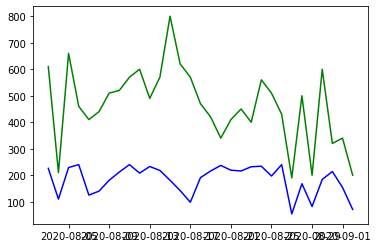

In [22]:
plt.plot(daily_scores_output['Date'], daily_scores_output['Score'], color='b')
plt.plot(daily_scores_output['Date'], daily_scores_output['Yield(Wh)'], color='g')
plt.show()